# Detecting meteors?

Here we are experimenting with methods to retrieve shapes of objects

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import math
import numpy as np
import numpy.linalg as la

In [2]:
# make a fake meteor near the horizon
phi0 = 20
phi1 = 70
n = 25
a = 0.8
b = 0.6
phi = np.linspace(phi0, phi1, n)
x = a*np.cos(phi*math.pi/180.0)
y = b*np.sin(phi*math.pi/180.0)

# make the horizon at radius 1
phi = np.linspace(0,360,361)
xh = np.cos(phi*math.pi/180.0)
yh = np.sin(phi*math.pi/180.0)

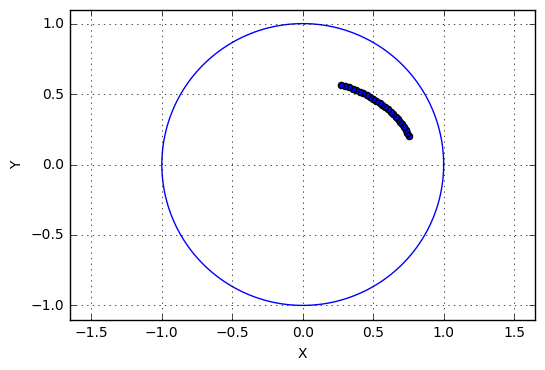

In [3]:
# plot the meteor and the horizon
plt.plot(xh,yh)
plt.scatter(x,y)
plt.axis('equal')
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [4]:
# moments of inertia
def moi(x,y,i=None):
    """
    Input a set of (x,y) or (x,y,i) pointed, from which it
    will compute a weighted moment of inertia
    Returns a set of points (xe,ye) that represents the 
    ellipse that represents the MOI
    """
    if i == None:
        m = np.ones(len(x))
    else:
        m = i
    # first find a rough center
    smx = ma.sum(m*x)
    smy = ma.sum(m*y)
    sm  = ma.sum(m)
    xm = smx/sm
    ym = smy/sm
    print('MOI::center: %f %f' % (xm,ym))
    
    # take 2nd moments w.r.t. this center
    dx = x-xm
    dy = y-ym
    mxx=m*dx*dx
    mxy=m*dx*dy
    myy=m*dy*dy
    #
    smxx=ma.sum(mxx)/sm
    smxy=ma.sum(mxy)/sm
    smyy=ma.sum(myy)/sm
    #  MOI2
    moi = np.array([smxx,smxy,smxy,smyy]).reshape(2,2)
    w,v = la.eig(moi)
    a   = math.sqrt(w[0])
    b   = math.sqrt(w[1])
    phi = -math.atan2(v[0][1],v[0][0])
    if a < b:  
        phi = phi + 0.5*np.pi
    print('MOI::a,b,b/a,phi(deg): %g %g %g %g' % (a,b,b/a,phi*180.0/np.pi))
    #
    sinp = np.sin(phi)
    cosp = np.cos(phi)
    # make the ellipse, and rotate it by phi
    phi = np.linspace(0,360,90)
    xe0 = a*np.cos(phi*math.pi/180.0)
    ye0 = b*np.sin(phi*math.pi/180.0)
    xe = cosp * xe0 - sinp * ye0 + xm
    ye = sinp * xe0 + cosp * ye0 + ym
    return (xe,ye)

In [5]:
(xe,ye) = moi(x,y)

MOI::center: 0.546439 0.409829
MOI::a,b,b/a,phi(deg): 0.181725 0.0205065 0.112844 -36.6541


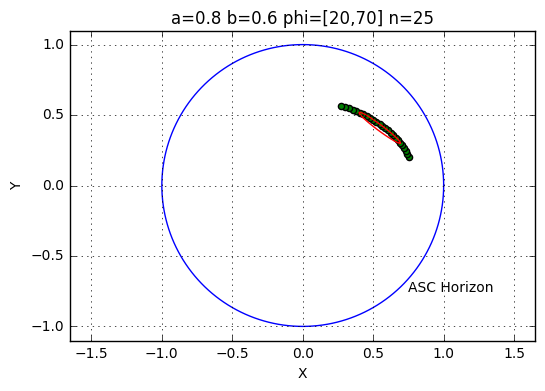

In [6]:
# plot the meteor, the horizon, and the MOI ellipse
plt.plot(xh,yh,'b')
plt.scatter(x,y,c='g')
plt.plot(xe,ye,'r')
plt.axis('equal')
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.text(0.75,-0.75,"ASC Horizon")
plt.title("a=%g b=%g phi=[%g,%g] n=%d" % (a,b,phi0,phi1,n))
plt.show()